# Lab02-1 - Image Representations (Part 1)

In this exercise, you'll learn how images are represented in the RGB color space and how to manipulate them using NumPy arrays. We will:

1. Load an image into a NumPy array  
2. Inspect its shape and pixel values  
3. Perform channel-wise operations  
4. Convert to grayscale  
5. Apply simple image effects (invert, brightness, masking)  
6. Save manipulated images back to disk  


## 2.1 Setup

First, make sure you have installed the required libraries and check what is your *present working directory*:

In [1]:
!pip install numpy pillow
!echo "Your current directory is: $(pwd)"

Your current directory is: /content


## 2.2 Utility Function
You are provided a utility function for rendering images.

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Utility function to display an image
#img_arry = img, cmap = color map
def show(img_array, cmap=None, title=""):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title(title)
    if cmap is None:
        plt.imshow(img_array, vmin=0, vmax=255)
    else:
        plt.imshow(img_array, cmap=cmap, vmin=0, vmax=255)
    plt.show()

## 2.3 Load an Image into a NumPy Array

- Put an image file (e.g., `input.jpg`) in the same folder as this notebook.
- Load it using Pillow and convert to a NumPy array.

Type: <class 'numpy.ndarray'>
Shape: (109, 581, 3)
Dtype: uint8


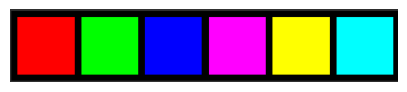

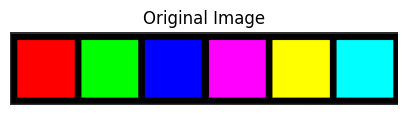

In [ ]:
# TODO: change the filename if needed
filename = "Color Tiles.png"

# Load image
img = Image.open(filename).convert("RGB") #CONVERT ให้เราอ่านค่าสามสีได้ ต่อให้แก้เป็น L ก็ไม่ gray 
# เพราะมันไล่ตามสี ต้องไปเปลี่ยยน color map ด้วย ไม่งั้นมันไม่้ข่าใจการที่เปลี่นเป็น L คือให้ไล่ระดับความสว้างถ้า cmap = none มันไปไล่สี 
# มั่วงไปเหลือง 0-255 ใช้ cmap= gray ให้มันไล่ขาวไปดำ0-255
img_np = np.array(img)  # shape: (height, width, 3) เราเก็บข้อมูล 3 chanal RGB

# Inspect
print("Type:", type(img_np))
print("Shape:", img_np.shape)
#รูปร่าง (y,x,z)
print("Dtype:", img_np.dtype)
#ข้อมูลที่เก็บในแต่ละ grid ในช่องใน ชาเนล เก็บ unsign int 8 0-255
# Display
show(img)
show(img_np, title="Original Image")

## 2.4 Accessing and Modifying Channels

The shape of the array is `(H, W, 3)` where the last axis corresponds to R, G, B.

1. Extract each channel.
2. Create a red-only, green-only, and blue-only image.


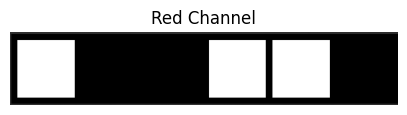

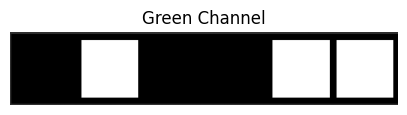

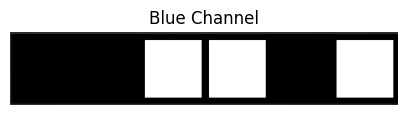

In [ ]:
# Extract channels
R = img_np[:, :, 0] # grid ที่มี channels เดียว
G = img_np[:, :, 1]
B = img_np[:, :, 2]

show(R, cmap="gray", title="Red Channel") #id none cmao = vidris
show(G, cmap="gray", title="Green Channel")
show(B, cmap="gray", title="Blue Channel")

Next, display R, G, and B channels in saparated color image as shown below:

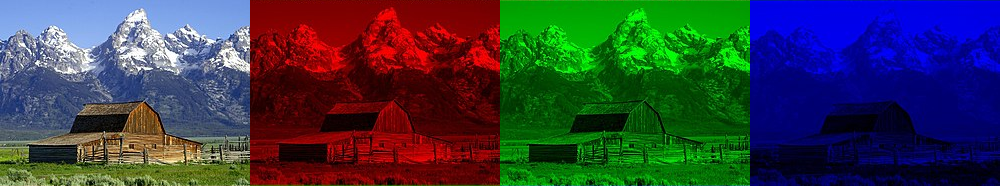

credit: https://en.wikipedia.org/wiki/RGB_color_model

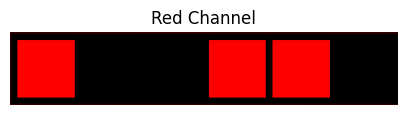

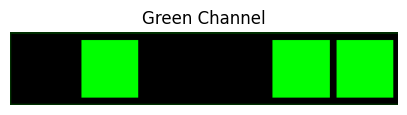

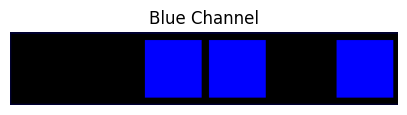

In [ ]:
# TODO: Create single-color images
zeros=np.zeros_like(R)
red_img = np.stack([R,zeros,zeros],axis=2) #เอามา1 อันคือเอาชั้นแรกที่เป็น red มาเก็บ มาซ้อนลงบน GBที่เป็น0เหหมือนกระดาษใสใน รูปของ3d ทำให้ไเ้เฉพาะสี
green_img = np.stack([zeros,G,zeros],axis=2) #axis=2 คือเอามาซ้อนกันในแกนที่ z depth
blue_img = np.stack([zeros,zeros,B],axis=2)

show(red_img, title="Red Channel")
show(green_img, title="Green Channel")
show(blue_img, title="Blue Channel")

## 2.5 Swapping Channels

Swap the red and blue channels (BGR instead of RGB).

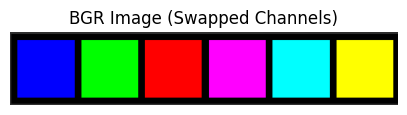

In [63]:
# Swap channels: RGB -> BGR
bgr_img = img_np[:,:, ::-1]  # สลับบนล่าง ลองดูreverses the last axis
show(bgr_img, title="BGR Image (Swapped Channels)")

## 2.6 Convert to Grayscale

A simple way to convert RGB to grayscale is to take a weighted sum:
Gray = 0.299 R + 0.587 G + 0.114 B

- Compute the grayscale image.
- Stack into a 3-channel array for display if needed.


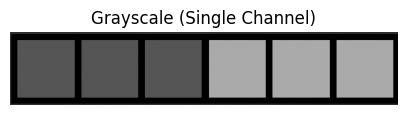

In [67]:
# TODO: Compute grayscale
#gray = img.convert("L")
gray= R/3+B/3+G/3
show(gray, cmap="gray", title="Grayscale (Single Channel)")
#show(gray, title="Grayscale (Single Channel)")

## 2.7 Simple Image Effects

1. Invert colors  
2. Increase brightness  
3. Apply a circular mask  

Complete the TODOs below.

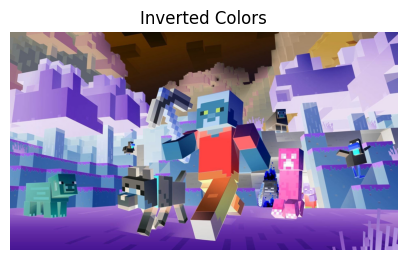

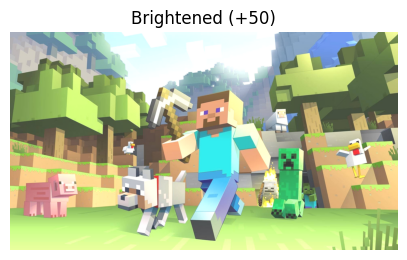

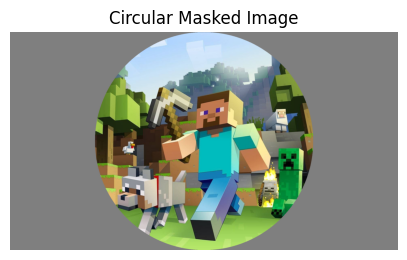

In [42]:
# 2.7-1 TODO: Invert 255- every frid in img_np
inverted = 255-img_np
show(inverted, title="Inverted Colors")

# 2.7-2 TODO: Increase brightness by 50 (clip at 255) 1 แปลง เป็น int ให้บวกผ่าน ละตั้ง clip convert กลับ
bright = np.clip(img_np.astype(int)+50,0,255).astype(np.uint8)
show(bright, title="Brightened (+50)")

# 2.7-3 Circular Mask
h, w, _ = img_np.shape

# Mask parameters
center_x, center_y = w // 2, h // 2
radius = min(h, w) // 2

# Create coordinate grids
Y, X = np.ogrid[:h, :w]

# Calculate distance from center
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Create boolean mask
mask = dist_from_center <= radius

# Copy image and apply mask
masked_img = img_np.copy()
masked_img[~mask] = [127, 127, 127]

show(masked_img, title="Circular Masked Image")

# 2.8 RGB Thresholding Image Filter

* Apply individual thresholds to Red, Green, and Blue channels
* Create a mask based on color thresholds

Complete the TODOs below.

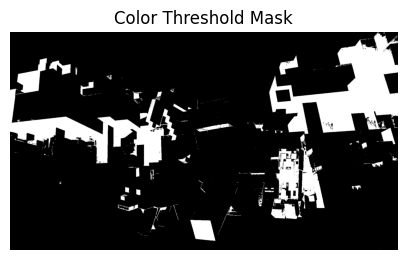

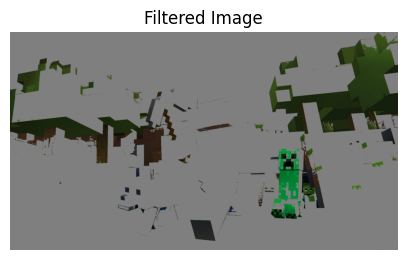

In [58]:
# Define individual threshold values
lower_red = 0
upper_red = 60

lower_green = 0
upper_green = 255

lower_blue = 0
upper_blue = 60 #แล้วทำไมไม่ ให้ GB เป็น0 ไปเลย

# TODO: Create channel-specific masks
mask_red = (img_np[:,:,0]>=lower_red)&(img_np[:,:,0]<=upper_red)
mask_green = (img_np[:,:,1]>=lower_green)&(img_np[:,:,1]<=upper_green)
mask_blue = (img_np[:,:,2]>=lower_blue)&(img_np[:,:,2]<=upper_blue)

# Combine masks (pixels must satisfy all channel conditions)
combined_mask = mask_red & mask_green & mask_blue

# Create filtered image
filtered_img = img_np.copy()
filtered_img[~combined_mask] = [127, 127, 127]  # Gray out pixels outside the threshold

show(combined_mask*255, cmap="gray", title="Color Threshold Mask")
show(filtered_img, title="Filtered Image")

# 2.9 Save a NumPy Array as an Image

* Specify an output filepath (e.g., output.jpg)
* Specify the numpy array that you would like to save as an image
* Save the array using Pillow

In [ ]:
# Save the numpy array as an image
output_path = '/content/output.jpg'
output_img = Image.fromarray(None) # TODO: specify which numpy array you would like to save

output_img.save(output_path)